# Graded Assignment 4 : CNNs

PyTorch
MNIST Classification using LeNET on Keras

In [0]:
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as backend
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
class LeNet:
      def build(ChannelNo, R, C, ClassNo,activation="relu"):
          model = Sequential()
          shapeval = (R, C, ChannelNo)
          model.add(Conv2D(20, 5, padding="same",input_shape=shapeval))
          model.add(Activation(activation))
          model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

          model.add(Conv2D(50, 5, padding="same"))
          model.add(Activation(activation))
          model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

          model.add(Flatten())
          model.add(Dense(500))
          model.add(Activation(activation))
          
          model.add(Dense(ClassNo))
          model.add(Activation("softmax"))

          return model

In [0]:
((xtrain, ytrain), (xtest, ytest)) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


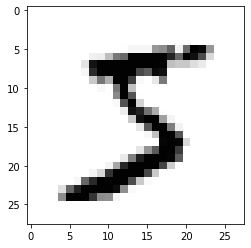

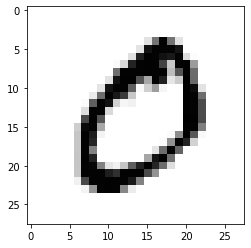

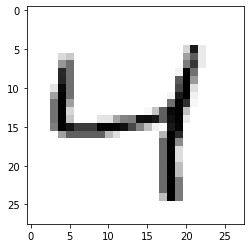

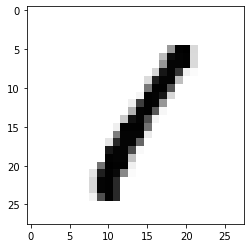

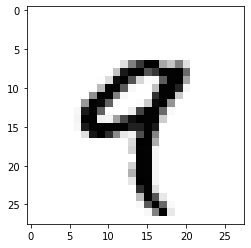

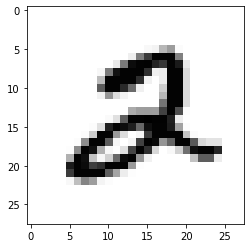

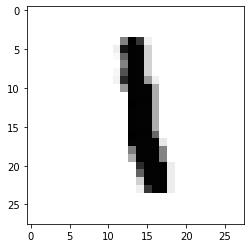

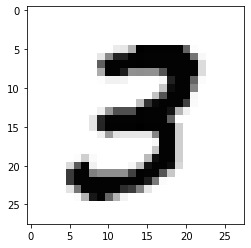

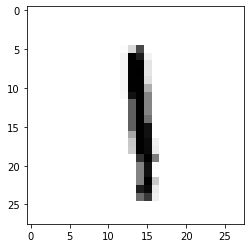

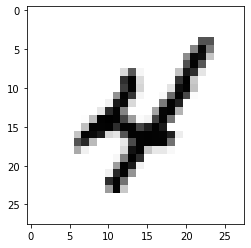

In [0]:
for i in range(10):
    img = np.asfarray(xtrain)[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [0]:
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))


In [0]:

xtrain = xtrain.astype("float32") / 255.0
xtest = xtest.astype("float32") / 255.0


In [0]:

ytrain = np_utils.to_categorical(ytrain, 10)
ytest = np_utils.to_categorical(ytest, 10)

In [0]:
model = LeNet.build(1, 28, 28,10)
model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01),metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)             

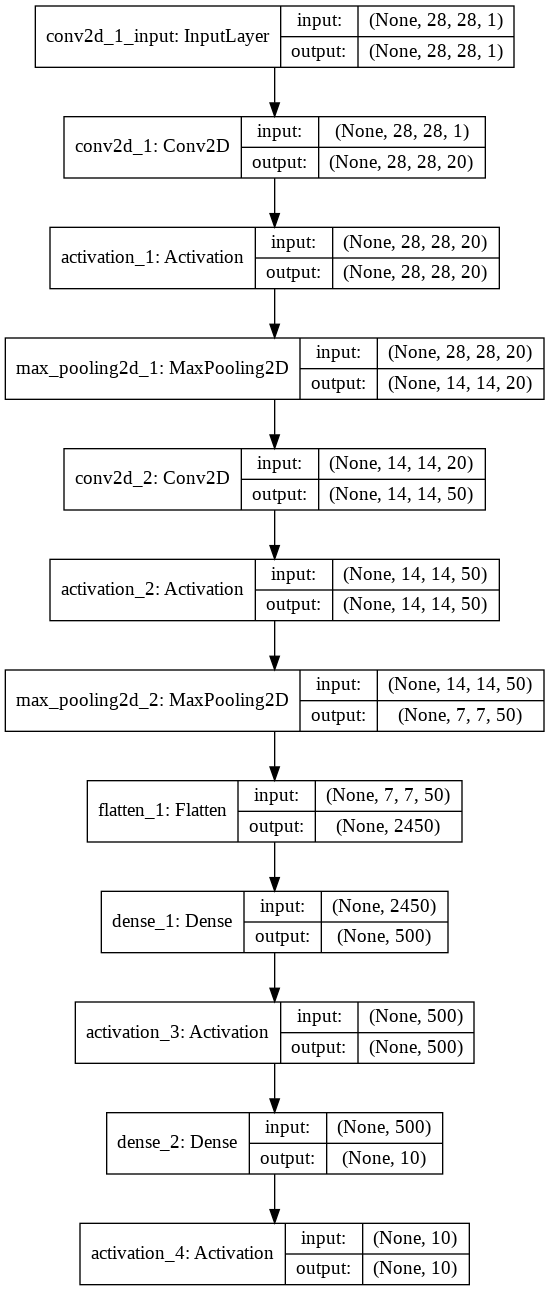

In [0]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [0]:
model.fit(xtrain, ytrain, batch_size=128, epochs=50,verbose=1)

print("training")

(loss, accuracy) = model.evaluate(xtest, ytest,batch_size=128, verbose=1)

print("accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.9957 - accuracy: 0.7290
Epoch 2/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.2547 - accuracy: 0.9238
Epoch 3/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1804 - accuracy: 0.9470
Epoch 4/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1407 - accuracy: 0.9580
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.1153 - accuracy: 0.9660
Epoch 6/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0985 - accuracy: 0.9714
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0869 - accuracy: 0.9741
Epoch 8/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0778 - accuracy: 0.9769
Epoch 9/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0712 - accuracy: 0.9790
Epoch 10/50
60000/60000 [=============================

In [0]:
score = model.evaluate(xtest,ytest)
print("Test Loss: ",score[0])
print("Test Accuracy: ",score[1])

10000/10000 [==============================] - 1s 77us/step
Test Loss:  0.030041632273126742
Test Accuracy:  0.9900000095367432


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np

In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [0]:
def load_data(train_batch_size, test_batch_size):
    # Fetch training data: total 60000 samples
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=train_batch_size, shuffle=True)

    # Fetch test data: total 10000 samples
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])),
        batch_size=test_batch_size, shuffle=True)

    return (train_loader, test_loader)

In [0]:
def train(model, optimizer, epoch, train_loader, log_interval):
    model.train()

    # define loss function
    loss_fn = torch.nn.CrossEntropyLoss()

    # Iterate over batches of data
    for batch_idx, (data, target) in enumerate(train_loader):
        # Wrap the input and target output in the `Variable` wrapper
        data, target = Variable(data), Variable(target)

        # Clear the gradients, since PyTorch accumulates them
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)

        loss = loss_fn(output, target)

        # Backward propagation
        loss.backward()

        # Update the parameters(weight,bias)
        optimizer.step()

        # print log
        if batch_idx % log_interval == 0:
            print('Train set, Epoch {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader),
                loss.item()))

In [0]:
def test(model, epoch, test_loader):
    # State that you are testing the model; this prevents layers e.g. Dropout to take effect
    model.eval()

    # Init loss & correct prediction accumulators
    test_loss = 0
    correct = 0

    # define loss function
    loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

    # Iterate over data
    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        
        # Forward propagation
        output = model(data)

        # Calculate & accumulate loss
        test_loss += loss_fn(output, target).item()

        # Get the index of the max log-probability (the predicted output label)
        pred = np.argmax(output.data, axis=1)

        # If correct, increment correct prediction accumulator
        correct = correct + np.equal(pred, target.data).sum()

    # Print log
    test_loss /= len(test_loader.dataset)
    print('\nTest set, Epoch {} , Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(epoch,
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Process and finding the Accuracy:

In [0]:
torch.manual_seed(123)

model = LeNet()

lr = 0.01
momentum=0.5
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_batch_size = 64
test_batch_size = 1000
train_loader, test_loader = load_data(train_batch_size, test_batch_size)

epochs = 10
log_interval = 100
for epoch in range(1, epochs + 1):
    train(model, optimizer, epoch, train_loader, log_interval=log_interval)
    test(model, epoch, test_loader)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!





/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Train set, Epoch 1 [0/60000 (0%)]	Loss: 2.297229
Train set, Epoch 1 [6400/60000 (11%)]	Loss: 2.138053
Train set, Epoch 1 [12800/60000 (21%)]	Loss: 0.613219
Train set, Epoch 1 [19200/60000 (32%)]	Loss: 0.292025
Train set, Epoch 1 [25600/60000 (43%)]	Loss: 0.421606
Train set, Epoch 1 [32000/60000 (53%)]	Loss: 0.274552
Train set, Epoch 1 [38400/60000 (64%)]	Loss: 0.261028
Train set, Epoch 1 [44800/60000 (75%)]	Loss: 0.124053
Train set, Epoch 1 [51200/60000 (85%)]	Loss: 0.161220
Train set, Epoch 1 [57600/60000 (96%)]	Loss: 0.118213


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set, Epoch 1 , Average loss: 0.1272, Accuracy: 9598/10000 (96%)

Train set, Epoch 2 [0/60000 (0%)]	Loss: 0.124289
Train set, Epoch 2 [6400/60000 (11%)]	Loss: 0.058056
Train set, Epoch 2 [12800/60000 (21%)]	Loss: 0.251738
Train set, Epoch 2 [19200/60000 (32%)]	Loss: 0.106818
Train set, Epoch 2 [25600/60000 (43%)]	Loss: 0.078260
Train set, Epoch 2 [32000/60000 (53%)]	Loss: 0.079035
Train set, Epoch 2 [38400/60000 (64%)]	Loss: 0.151185
Train set, Epoch 2 [44800/60000 (75%)]	Loss: 0.038826
Train set, Epoch 2 [51200/60000 (85%)]	Loss: 0.109503
Train set, Epoch 2 [57600/60000 (96%)]	Loss: 0.093752

Test set, Epoch 2 , Average loss: 0.1007, Accuracy: 9670/10000 (97%)

Train set, Epoch 3 [0/60000 (0%)]	Loss: 0.144767
Train set, Epoch 3 [6400/60000 (11%)]	Loss: 0.029333
Train set, Epoch 3 [12800/60000 (21%)]	Loss: 0.062923
Train set, Epoch 3 [19200/60000 (32%)]	Loss: 0.047911
Train set, Epoch 3 [25600/60000 (43%)]	Loss: 0.067235
Train set, Epoch 3 [32000/60000 (53%)]	Loss: 0.040040
Train 